[View in Colaboratory](https://colab.research.google.com/github/paulanavarretec/RecSys-Tarea1/blob/master/Recsys_Tarea1_Sensitivity_Analysis.ipynb)

# SENSITIVITY ANALYSIS

# Data load

In [2]:
#Run this cell. You must upload the files to be used to analyse: training_data.csv, test_rating_data.csv y ranking_users.txt
from google.colab import files
uploaded = files.upload()

# Load files to data frame
import pandas as pd #Import library

train_70 = pd.read_csv('train_70.csv',
                         sep=',',
                         names = ['obsNo','userID', 'itemID', 'styleID', 'rating','brewerID','timestamp'],
                         header=0)
train_30 = pd.read_csv('train_30.csv',
                         sep=',',
                         names = ['obsNo','userID', 'itemID', 'styleID', 'rating','brewerID','timestamp'],
                         header=0)
# Test
print(train_70.head())
print(train_30.head())

# Load relevant libraries
!pip install pyreclab
import pyreclab
import numpy as np

Saving train_30.csv to train_30 (2).csv
Saving train_70.csv to train_70 (2).csv
       obsNo  userID  itemID  styleID  rating  brewerID   timestamp
34361  34388     629    1018      263     4.5       263  1169360528
20635  20644    5768   20470      394     3.0       394  1222029461
13013  13022    1042   35036     1199     4.5      1199  1283618267
3126    3126    5224    7348     1199     3.5      1199  1232323069
20464  20473    4711   21822     1199     5.0      1199  1235738254
    obsNo  userID  itemID  styleID  rating  brewerID   timestamp
2       2    4924   19960     1199     5.0      1199  1223914717
4       4    2916   57110    14879     4.0     14879  1279318326
5       5    2916   21822     1199     4.0      1199  1292025037
14     14    7749    7675     3268     4.5      3268  1125287650
15     15    4136   11493     5313     1.5      5313  1211390912


# ItemKnn parameter

Training and predicting - Neighbors:  1
Training and predicting - Neighbors:  2
Training and predicting - Neighbors:  3
Training and predicting - Neighbors:  5
Training and predicting - Neighbors:  10
Training and predicting - Neighbors:  15
Training and predicting - Neighbors:  20
Training and predicting - Neighbors:  25
Training and predicting - Neighbors:  30
Training and predicting - Neighbors:  35


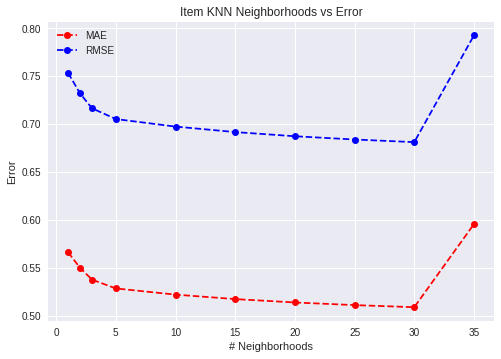

In [3]:
# Create object
ItemKnn = pyreclab.ItemKnn(dataset='train_70.csv',
                           dlmchar=b',',
                           header=True,
                           usercol=2,
                           itemcol=3,
                           ratingcol=5)


# Loop for parameter search
n = [1,2,3,5,10,15,20,25,30,35]
predlist = [0]*len(n)
mae = [0]*len(n)
rmse = [0]*len(n)


for i in range(len(n)):
  
  print("Training and predicting - Neighbors: ",n[i])
  
  ItemKnn.train(n[i], 'pearson')
  predlist[i-1], mae[i-1], rmse[i-1] = ItemKnn.test(input_file='train_30.csv',
                                     dlmchar=b',',
                                     header=True,
                                     usercol=2,
                                     itemcol=3,
                                     ratingcol=5,
                                     output_file='predictions.csv')

# Plot errors
import matplotlib.pyplot as plt

plt.plot(n, mae, marker='o', linestyle='--', color='r', label='MAE')
plt.plot(n, rmse, marker='o', linestyle='--', color='b', label='RMSE')

plt.xlabel('# Neighborhoods')
plt.ylabel('Error')
plt.title('Item KNN Neighborhoods vs Error')
plt.legend()
plt.show()

# UserKnn parameter

Training and predicting - Neighbors:  1
Training and predicting - Neighbors:  2
Training and predicting - Neighbors:  3
Training and predicting - Neighbors:  5
Training and predicting - Neighbors:  10
Training and predicting - Neighbors:  15
Training and predicting - Neighbors:  20
Training and predicting - Neighbors:  25
Training and predicting - Neighbors:  30
Training and predicting - Neighbors:  35
Training and predicting - Neighbors:  50
Training and predicting - Neighbors:  100
Training and predicting - Neighbors:  150
Training and predicting - Neighbors:  200
Training and predicting - Neighbors:  250
Min mae factor:  0.49221543285820646 con 100 Neighborhoods
Min rmse factor:  0.648840159482241 con 100 Neighborhoods


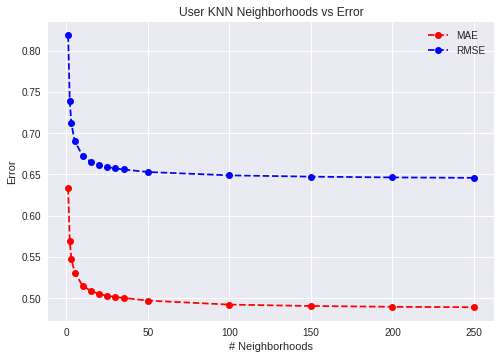

In [4]:
# Create object
UserKnn = pyreclab.UserKnn(dataset='train_70.csv',
                           dlmchar=b',',
                           header=True,
                           usercol=2,
                           itemcol=3,
                           ratingcol=5)


# Loop for parameter search
n = [1,2,3,5,10,15,20,25,30,35,50,100,150,200,250]
predlist = [0]*len(n)
mae = [0]*len(n)
rmse = [0]*len(n)


n1, n2, min_mae, min_rmse = -1, -1, 100 , 100


for i in range(len(n)):
  
  print("Training and predicting - Neighbors: ",n[i])
  
  UserKnn.train(n[i], 'pearson')
  predlist[i], mae[i], rmse[i] = UserKnn.test(input_file='train_30.csv',
                                     dlmchar=b',',
                                     header=True,
                                     usercol=2,
                                     itemcol=3,
                                     ratingcol=5,
                                     output_file='predictions.csv')
  
  # Get optimal values
  # Limit descent in error to be bigger than 0,001
  if mae[i]+0.01 < min_mae: 
    min_mae = mae[i]
    n1 = n[i]
  
  if rmse[i]+0.01 < min_rmse:
    min_rmse = rmse[i]
    n2 = n[i]
  
print('Min mae factor: ',min_mae, 'con' ,n1, 'Neighborhoods')
print('Min rmse factor: ',min_rmse, 'con' ,n2, 'Neighborhoods')
  
# Plot Errors
import matplotlib.pyplot as plt

plt.plot(n, mae, marker='o', linestyle='--', color='r', label='MAE')
plt.plot(n, rmse, marker='o', linestyle='--', color='b', label='RMSE')

plt.xlabel('# Neighborhoods')
plt.ylabel('Error')
plt.title('User KNN Neighborhoods vs Error')
plt.legend()
plt.show()

## SVD

Training and predicting - factors:  1
Training and predicting - factors:  5
Training and predicting - factors:  10
Training and predicting - factors:  40
Training and predicting - factors:  60
Training and predicting - factors:  80
Training and predicting - factors:  100
Training and predicting - factors:  150
Training and predicting - factors:  200
Training and predicting - factors:  250
Min mae factor:  0.454985682082531 con 150 factores
Min rmse factor:  0.6024758114198427 con 200 factores


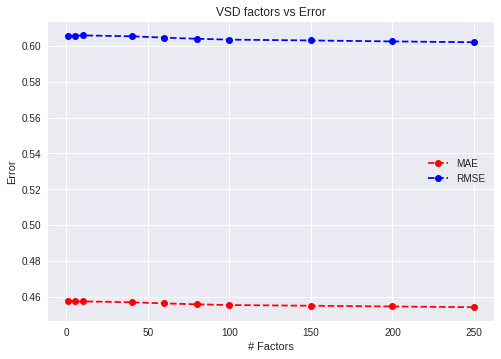

In [0]:
# Create object
SVD = pyreclab.SVD(dataset='train_70.csv',
                   dlmchar=b',',
                   header=True,
                   usercol=2,
                   itemcol=3,
                   ratingcol=5)

n = [1,5,10,40,60,80,100,150,200,250]
predlist = [0]*len(n)
mae = [0]*len(n)
rmse = [0]*len(n)

i1, i2, min_mae, min_rmse = -1, -1, 100 , 100

for i in range(len(n)):
  
  print("Training and predicting - factors: ",n[i])
  
  SVD.train(n[i], maxiter=100, lr=0.01, lamb=0.1)
  predlist[i], mae[i], rmse[i] = SVD.test(input_file='train_30.csv',
                                     dlmchar=b',',
                                     header=True,
                                     usercol=2,
                                     itemcol=3,
                                     ratingcol=5,
                                     output_file='predictions.csv')
  
  # Get optimal values
  # Limit descent in error to be bigger than 0,001
  if mae[i]+0.001 < min_mae: 
    min_mae = mae[i]
    n1 = n[i]
  
  if rmse[i]+0.001 < min_rmse:
    min_rmse = rmse[i]
    n2 = n[i]
  
print('Min mae: ',min_mae, 'con' ,n1, 'factores')
print('Min rmse: ',min_rmse, 'con' ,n2, 'factores')


#Plot Errors
import matplotlib.pyplot as plt

plt.plot(n, mae, marker='o', linestyle='--', color='r', label='MAE')
plt.plot(n, rmse, marker='o', linestyle='--', color='b', label='RMSE')

# plt.plot(radius, area)
plt.xlabel('# Factors')
plt.ylabel('Error')
plt.title('VSD factors vs Error')
plt.legend()

plt.show()

Now we take the number of factor with min error and search for a maximun iteration error minimizator.

Training and predicting - iterations:  1
Training and predicting - iterations:  5
Training and predicting - iterations:  10
Training and predicting - iterations:  30
Training and predicting - iterations:  60
Training and predicting - iterations:  100
Training and predicting - iterations:  150
Training and predicting - iterations:  200
Training and predicting - iterations:  250
Min mae:  0.45369764467882634 con 150 max-iterations
Min rmse:  0.6017588680754634 con 200 max-iterations


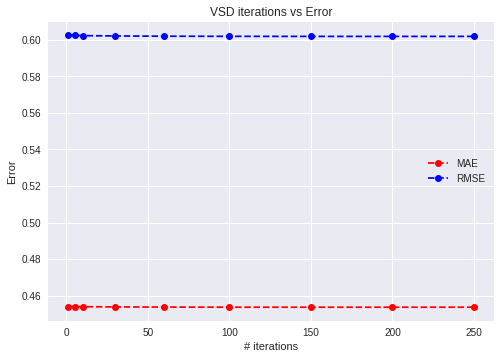

In [0]:
n = [1,5,10,30,60,100,150,200,250]
predlist = [0]*len(n)
mae = [0]*len(n)
rmse = [0]*len(n)

i1, i2, min_mae, min_rmse = -1, -1, 100 , 100

for i in range(len(n)):
  
  print("Training and predicting - iterations: ",n[i])
  
  SVD.train(200, maxiter=n[i], lr=0.01, lamb=0.1)
  predlist[i], mae[i], rmse[i] = SVD.test(input_file='train_30.csv',
                                     dlmchar=b',',
                                     header=True,
                                     usercol=2,
                                     itemcol=3,
                                     ratingcol=5,
                                     output_file='predictions.csv')
 
  # Get optimal values
  if mae[i] < min_mae: 
    min_mae = mae[i]
    n1 = n[i]
  
  if rmse[i] < min_rmse:
    min_rmse = rmse[i]
    n2 = n[i]
  
print('Min mae: ',min_mae, 'con' ,n1, 'max-iterations')
print('Min rmse: ',min_rmse, 'con' ,n2, 'max-iterations')


#Plot Errors
import matplotlib.pyplot as plt

plt.plot(n, mae, marker='o', linestyle='--', color='r', label='MAE')
plt.plot(n, rmse, marker='o', linestyle='--', color='b', label='RMSE')

# plt.plot(radius, area)
plt.xlabel('# iterations')
plt.ylabel('Error')
plt.title('VSD iterations vs Error')
plt.legend()

plt.show()